In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import xarray as xr

from datetime import datetime, timedelta

import intake
import healpy
# import tobac

In [2]:
import eccodes

In [3]:
eccodes.__version__

'2.34.1'

In [4]:
cat = intake.open_catalog("https://data.nextgems-h2020.eu/catalog.yaml")
cat.IFS['IFS_9-FESOM_5-production']['2D_hourly_healpix512']

2D_hourly_healpix512:
  args:
    consolidated: false
    urlpath:
    - reference::/scratch/m/m300827/IFS_9-FESOM_5-production_2d_hourly_healpix512_combined.parq
  description: ''
  driver: intake_xarray.xzarr.ZarrSource
  metadata:
    catalog_dir: https://data.nextgems-h2020.eu/IFS


In [5]:
import pandas as pd

pd.DataFrame(cat.IFS['IFS_9-FESOM_5-production']['2D_hourly_healpix512'].describe()["user_parameters"])

""


In [6]:
cat.IFS['IFS_9-FESOM_5-production']

IFS_9-FESOM_5-production:
  args:
    path: https://data.nextgems-h2020.eu/IFS/tco1279-ng5-production-years.yaml
  description: main 9km scenario (SSP3-7.0), coupled with FESOM 5km
  driver: intake.catalog.local.YAMLFileCatalog
  metadata:
    catalog_dir: https://data.nextgems-h2020.eu/IFS


In [7]:
ifs = cat.IFS['IFS_9-FESOM_5-production']

In [8]:
cat.IFS['IFS_9-FESOM_5-production']['2D_hourly_healpix512']

2D_hourly_healpix512:
  args:
    consolidated: false
    urlpath:
    - reference::/scratch/m/m300827/IFS_9-FESOM_5-production_2d_hourly_healpix512_combined.parq
  description: ''
  driver: intake_xarray.xzarr.ZarrSource
  metadata:
    catalog_dir: https://data.nextgems-h2020.eu/IFS


In [9]:
ifs_healpix = cat.IFS['IFS_9-FESOM_5-production']['3D_hourly_healpix512_2025']

In [10]:
ifs_healpix.describe()

{'name': '3D_hourly_healpix512_2025',
 'container': 'xarray',
 'plugin': ['zarr'],
 'driver': ['zarr'],
 'description': '',
 'direct_access': 'forbid',
 'user_parameters': [],
 'metadata': {},
 'args': {'consolidated': False,
  'urlpath': ['reference::/work/bm1235/a270046/cycle4/gribscan_1h1d_2D_healpix512/jsons.2025/pl.dir/atm3d.json',
   'reference::/work/bm1235/a270046/cycle4/gribscan_1h1d_2D_healpix512/jsons.2026/pl.dir/atm3d.json',
   'reference::/work/bm1235/a270046/cycle4/gribscan_1h1d_2D_healpix512/jsons.2027/pl.dir/atm3d.json',
   'reference::/work/bm1235/a270046/cycle4/gribscan_1h1d_2D_healpix512/jsons.2028/pl.dir/atm3d.json',
   'reference::/work/bm1235/a270046/cycle4/gribscan_1h1d_2D_healpix512/jsons.2029/pl.dir/atm3d.json']}}

In [11]:
dataset = ifs_healpix.to_dask()
dataset

/home/b/b382728/miniconda3/envs/tobac/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 358TB
Dimensions:  (time: 43824, level: 25, value: 3145728)
Coordinates:
    lat      (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
  * level    (level) int64 200B 1 5 10 20 30 50 70 ... 875 900 925 950 975 1000
    lon      (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
  * time     (time) datetime64[ns] 351kB 2025-01-01 ... 2029-12-31T23:00:00
Dimensions without coordinates: value
Data variables: (12/13)
    cc       (time, level, value) float64 28TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    ciwc     (time, level, value) float64 28TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    clwc     (time, level, value) float64 28TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    crwc     (time, level, value) float64 28TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    cswc     (time, level, value) float64 28TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    pv       (time, level, value) float64 28TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    ...       ...
    r        (time, level, value) float64 28TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    t        (time, level, value) float64 28TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    u        (time, level, value) float64 28TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    v        (time, level, value) float64 28TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    w        (time, level, value) float64 28TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    z        (time, level, value) float64 28TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          1003
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [12]:
cat.IFS['IFS_9-FESOM_5-production']['2D_daily_healpix512_ocean'].to_dask()

/home/b/b382728/miniconda3/envs/tobac/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 2TB
Dimensions:        (time: 8990, value: 3145728)
Coordinates:
    lat            (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
    lon            (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
  * time           (time) datetime64[ns] 72kB 2020-01-21 ... 2045-01-01
Dimensions without coordinates: value
Data variables:
    avg_mlotst125  (time, value) float64 226GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_siconc     (time, value) float64 226GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_sisnthick  (time, value) float64 226GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_sithick    (time, value) float64 226GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_siue       (time, value) float64 226GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_sivn       (time, value) float64 226GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_sos        (time, value) float64 226GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_tos        (time, value) float64 226GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_zos        (time, value) float64 226GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          1003
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [13]:
cat.IFS['IFS_9-FESOM_5-production']['2D_monthly_healpix512']

2D_monthly_healpix512:
  args:
    consolidated: false
    drop_variables:
    - sst
    - ci
    - 10si
    - 100si
    urlpath:
    - reference::/work/bm1235/a270046/cycle4/gribscan_monthly_healpix512/jsons.2020-2030/sfc.dir/atm2d.json
    - reference::/work/bm1235/a270046/cycle4/gribscan_monthly_healpix512/jsons.2030-2034/sfc.dir/atm2d.json
    - reference::/work/bm1235/a270046/cycle4/gribscan_monthly_healpix512/jsons.2035-2039/sfc.dir/atm2d.json
    - reference::/work/bm1235/a270046/cycle4/gribscan_monthly_healpix512/jsons.2040-2043/sfc.dir/atm2d.json
    - reference::/work/bm1235/a270046/cycle4/gribscan_monthly_healpix512/jsons.2044/sfc.dir/atm2d.json
  description: ''
  driver: intake_xarray.xzarr.ZarrSource
  metadata:
    catalog_dir: https://data.nextgems-h2020.eu/IFS


In [14]:
cat.IFS['IFS_9-FESOM_5-production']['2D_monthly_healpix512'].to_dask()

/home/b/b382728/miniconda3/envs/tobac/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 430GB
Dimensions:  (time: 300, value: 3145728)
Coordinates:
    lat      (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
    lon      (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2kB 2020-02-01 2020-03-01 ... 2045-01-01
Dimensions without coordinates: value
Data variables: (12/57)
    10u      (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    10v      (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    2d       (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    blh      (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    chnk     (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    e        (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ...       ...
    tisr     (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tp       (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tsr      (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tsrc     (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ttr      (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ttrc     (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          1003
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [15]:
cat.IFS['IFS_9-FESOM_5-production']['2D_hourly_healpix512'].to_dask()

/home/b/b382728/miniconda3/envs/tobac/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 330TB
Dimensions:  (time: 218713, value: 3145728)
Coordinates:
    lat      (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    lon      (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
  * time     (time) datetime64[ns] 2MB 2020-01-20 ... 2045-01-01
Dimensions without coordinates: value
Data variables: (12/58)
    10si     (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    10u      (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    10v      (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    2d       (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    2t       (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    blh      (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ...       ...
    tp       (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tprate   (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tsr      (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tsrc     (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ttr      (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ttrc     (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          1003
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [16]:
dataset.t.isel(time=0).compute()

<xarray.DataArray 't' (level: 25, value: 3145728)> Size: 629MB
array([[261.12929535, 261.18062592, 260.89810944, ..., 255.76515198,
        255.5459671 , 255.68802643],
       [242.67695618, 242.67750549, 242.59975433, ..., 239.94351959,
        239.7276535 , 239.76548767],
       [225.41930771, 225.42362595, 225.50144196, ..., 230.3354454 ,
        230.37047195, 230.35300827],
       ...,
       [294.4039917 , 294.38128662, 294.38709259, ..., 296.75826263,
        296.79251099, 296.73124695],
       [296.54042816, 296.50273132, 296.46809387, ..., 297.74516296,
        297.69894409, 297.69693756],
       [298.70189667, 298.67236328, 298.6243515 , ..., 299.91314697,
        299.81446838, 299.854599  ]])
Coordinates:
    lat      (value) float64 25MB 0.0746 0.1492 0.1492 ... -0.1492 -0.0746
  * level    (level) int64 200B 1 5 10 20 30 50 70 ... 875 900 925 950 975 1000
    lon      (value) float64 25MB 45.0 45.09 44.91 45.0 ... 315.1 314.9 315.0
    time     datetime64[ns] 8B 2025-01-01
Dimensions without coordinates: value
Attributes: (12/15)
    paramId:                    130
    dataType:                   fc
    numberOfPoints:             3145728
    typeOfLevel:                isobaricInhPa
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    name:                       Temperature
    cfName:                     air_temperature
    cfVarName:                  t
    missingValue:               9999
    NV:                         0
    gridDefinitionDescription:  150

In [18]:
dataset = cat.IFS['IFS_9-FESOM_5-production']['2D_hourly_healpix512'].to_dask()

In [19]:
olr = dataset.ttr
olr

<xarray.DataArray 'ttr' (time: 218713, value: 3145728)> Size: 6TB
dask.array<open_dataset-ttr, shape=(218713, 3145728), dtype=float64, chunksize=(1, 3145728), chunktype=numpy.ndarray>
Coordinates:
    lat      (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    lon      (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
  * time     (time) datetime64[ns] 2MB 2020-01-20 ... 2045-01-01
Dimensions without coordinates: value
Attributes: (12/15)
    paramId:                    179
    dataType:                   fc
    numberOfPoints:             3145728
    typeOfLevel:                nominalTop
    stepUnits:                  1
    stepType:                   accum
    ...                         ...
    name:                       Top net long-wave (thermal) radiation
    cfName:                     toa_outgoing_longwave_flux
    cfVarName:                  ttr
    missingValue:               9999
    NV:                         0
    gridDefinitionDescription:  150

In [20]:
dataset.tp.isel(time=1000).compute()

<xarray.DataArray 'tp' (value: 3145728)> Size: 25MB
array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       7.74785876e-05, 9.82880592e-05, 1.80602074e-04])
Coordinates:
    lat      (value) float64 25MB 6.952e-310 6.952e-310 ... 292.4 292.4
    lon      (value) float64 25MB 6.952e-310 6.952e-310 ... 296.8 296.7
    time     datetime64[ns] 8B 2020-03-01T16:00:00
Dimensions without coordinates: value
Attributes: (12/14)
    paramId:                    228
    dataType:                   fc
    numberOfPoints:             3145728
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   accum
    ...                         ...
    units:                      m
    name:                       Total precipitation
    cfVarName:                  tp
    missingValue:               9999
    NV:                         0
    gridDefinitionDescription:  150

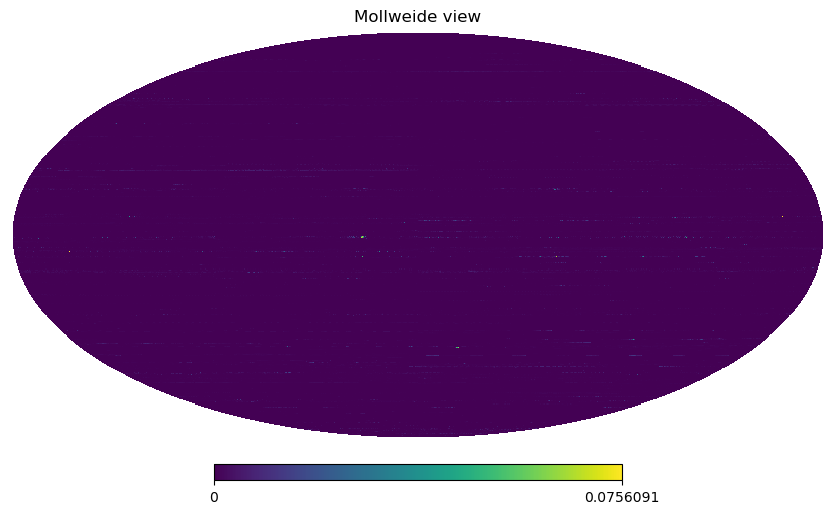

In [21]:
healpy.mollview(dataset.tp.isel(time=1000), flip="geo")#, nest=get_nest(dataset))

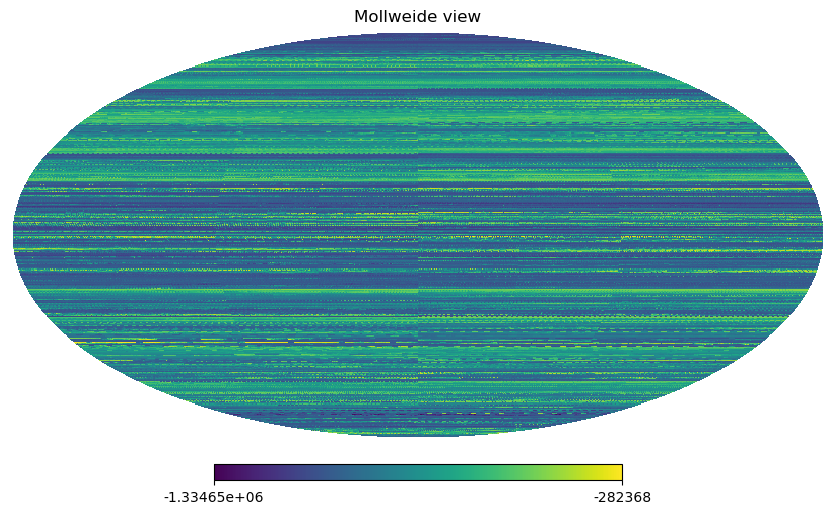

In [26]:
healpy.mollview(dataset.ttr.isel(time=1001))

In [24]:
dataset

<xarray.Dataset> Size: 330TB
Dimensions:  (time: 218713, value: 3145728)
Coordinates:
    lat      (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    lon      (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
  * time     (time) datetime64[ns] 2MB 2020-01-20 ... 2045-01-01
Dimensions without coordinates: value
Data variables: (12/58)
    10si     (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    10u      (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    10v      (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    2d       (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    2t       (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    blh      (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ...       ...
    tp       (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tprate   (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tsr      (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tsrc     (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ttr      (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ttrc     (time, value) float64 6TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          1003
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [28]:
lon = xr.DataArray(np.arange(0.05, 360, 0.1), dims=("lon",), name="lon", attrs=dict(units="degrees", standard_name="longitude"))
lat = xr.DataArray(np.arange(89.95, -90, -0.1), dims=("lat",), name="lat", attrs=dict(units="degrees", standard_name="latitude"))

pix = xr.DataArray(
    healpy.ang2pix(512, *np.meshgrid(lon, lat), nest=True, lonlat=True),
    coords=(lat, lon),
)


In [32]:
dataset.ttr.isel(time=1000)

<xarray.DataArray 'ttr' (value: 3145728)> Size: 25MB
dask.array<getitem, shape=(3145728,), dtype=float64, chunksize=(3145728,), chunktype=numpy.ndarray>
Coordinates:
    lat      (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
    lon      (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
    time     datetime64[ns] 8B 2020-03-01T16:00:00
Dimensions without coordinates: value
Attributes: (12/15)
    paramId:                    179
    dataType:                   fc
    numberOfPoints:             3145728
    typeOfLevel:                nominalTop
    stepUnits:                  1
    stepType:                   accum
    ...                         ...
    name:                       Top net long-wave (thermal) radiation
    cfName:                     toa_outgoing_longwave_flux
    cfVarName:                  ttr
    missingValue:               9999
    NV:                         0
    gridDefinitionDescription:  150

In [33]:
dataset.ttr.isel(time=1000).drop_vars(["lat", "lon"]).compute().isel(value=pix)

<xarray.DataArray 'ttr' (lat: 1800, lon: 3600)> Size: 52MB
array([[-635642.75  , -635642.75  , -635642.75  , ..., -634230.    ,
        -634230.    , -634230.    ],
       [-634518.875 , -634518.875 , -634518.875 , ..., -632814.8125,
        -632814.8125, -632814.8125],
       [-633171.9375, -633171.9375, -633171.9375, ..., -631687.875 ,
        -631687.875 , -631687.875 ],
       ...,
       [-550873.    , -550873.    , -550873.    , ..., -552847.4375,
        -552847.4375, -552847.4375],
       [-548175.0625, -548175.0625, -548175.0625, ..., -551948.1875,
        -551948.1875, -551948.1875],
       [-545993.125 , -545993.125 , -545993.125 , ..., -547839.5   ,
        -547839.5   , -547839.5   ]])
Coordinates:
    time     datetime64[ns] 8B 2020-03-01T16:00:00
  * lat      (lat) float64 14kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float64 29kB 0.05 0.15 0.25 0.35 ... 359.7 359.8 359.9 360.0
Attributes: (12/15)
    paramId:                    179
    dataType:                   fc
    numberOfPoints:             3145728
    typeOfLevel:                nominalTop
    stepUnits:                  1
    stepType:                   accum
    ...                         ...
    name:                       Top net long-wave (thermal) radiation
    cfName:                     toa_outgoing_longwave_flux
    cfVarName:                  ttr
    missingValue:               9999
    NV:                         0
    gridDefinitionDescription:  150

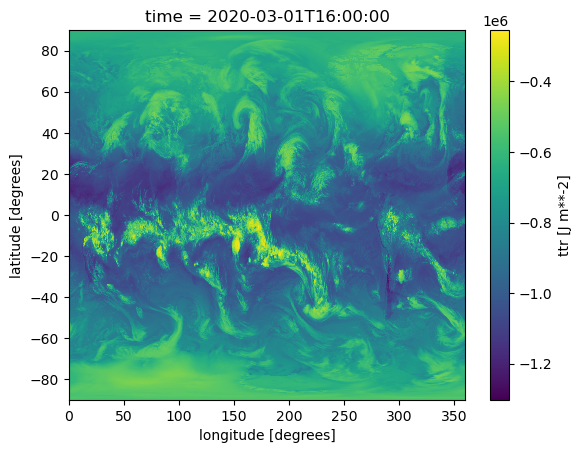

In [34]:
dataset.ttr.isel(time=1000).drop_vars(["lat", "lon"]).compute().isel(value=pix).plot()

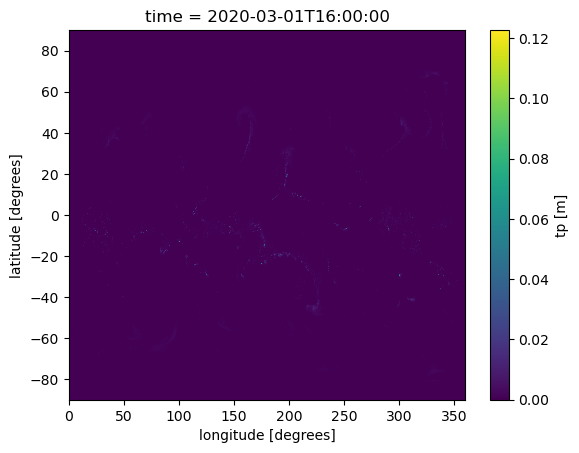

In [35]:
dataset.tp.isel(time=1000).drop_vars(["lat", "lon"]).compute().isel(value=pix).plot()